# Project 1. 코로나 데이터 분석

## 프로젝트 목표
- 서울시 코로나 19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차
1. **데이터 읽기:** 코로나 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제<br>
    2.1. 비어있는 column 지우기<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 확진일 데이터 전처리하기<br>
    3.2. 월별 확진자 수 출력<br>
    3.3. 8월 일별 확진자 수 출력<br>
    3.4. 지역별 확진자 수 출력<br>
    3.5. 8월달 지역별 확진자 수 출력<br>
    3.6. 월별 관악구 확진자 수 출력<br>
    3.7. 서울 지역에서 확진자를 지도에 출력<br>

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

## 프로젝트 개요

2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고 있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 6개월 이상 지난 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트에서는 국내 공공데이터 포털에서 제공하는 `서울시 코로나19 확진자 현황` 데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.



## 모듈 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 파일 불러오기

In [ ]:
corona_info = pd.read_csv('/content/drive/MyDrive/colab/machine_learning/[project 1]국내 코로나 환자 데이터를 활용한 데이터 분석/서울시 코로나19 확진자 현황.csv')

In [ ]:
corona_info.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [ ]:
corona_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


## 데이터 정제하기

In [ ]:
corona_del_info = corona_info.drop(columns=['국적', '환자정보', '조치사항'])

In [ ]:
corona_del_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


## 데이터 시각화

### 1) 확진일 데이터 전처리하기

In [ ]:
corona_del_info['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [ ]:
# month, day 데이터로 분리
month = []
day = []

for data in corona_del_info['확진일']:
  month.append(data.split('.')[0])
  day.append(data.split('.')[1])

In [ ]:
corona_del_info['month'] = month
corona_del_info['day'] = day

# dtype을 숫자형태로 바꿔주기
corona_del_info['month'].astype('int64')
corona_del_info['day'].astype('int64')

0       21
1       21
2       21
3       21
4       21
        ..
5743    31
5744    30
5745    30
5746    30
5747    24
Name: day, Length: 5748, dtype: int64

### 2) 월별 확진자 수 출력

In [ ]:
order = []  # 그래프 x축의 순서 정리

for i in range(1, 11): # 데이터가 1월부터 10월까지 존재
  order.append(str(i))

order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

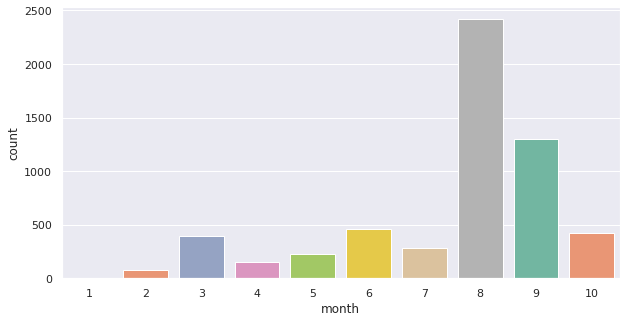

In [ ]:
# 그래프 사이즈 조절
plt.figure(figsize=(10, 5))

# seaborn의 countplot 함수 사용
sns.set(style='darkgrid')
ax = sns.countplot(x='month', data=corona_del_info, palette='Set2', order=order)

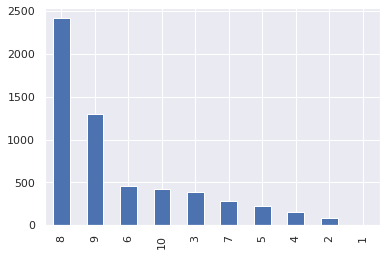

In [ ]:
# series의 plot 함수를 사용한 방법도 존재함
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수
corona_del_info['month'].value_counts().plot(kind='bar')

### 3) 8월달 일별 확진자 수 출력

In [ ]:
order2 = []  # 그래프 x축의 순서 정리

for i in range(1, 32): # 데이터가 1월부터 10월까지 존재
  order2.append(str(i))

order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

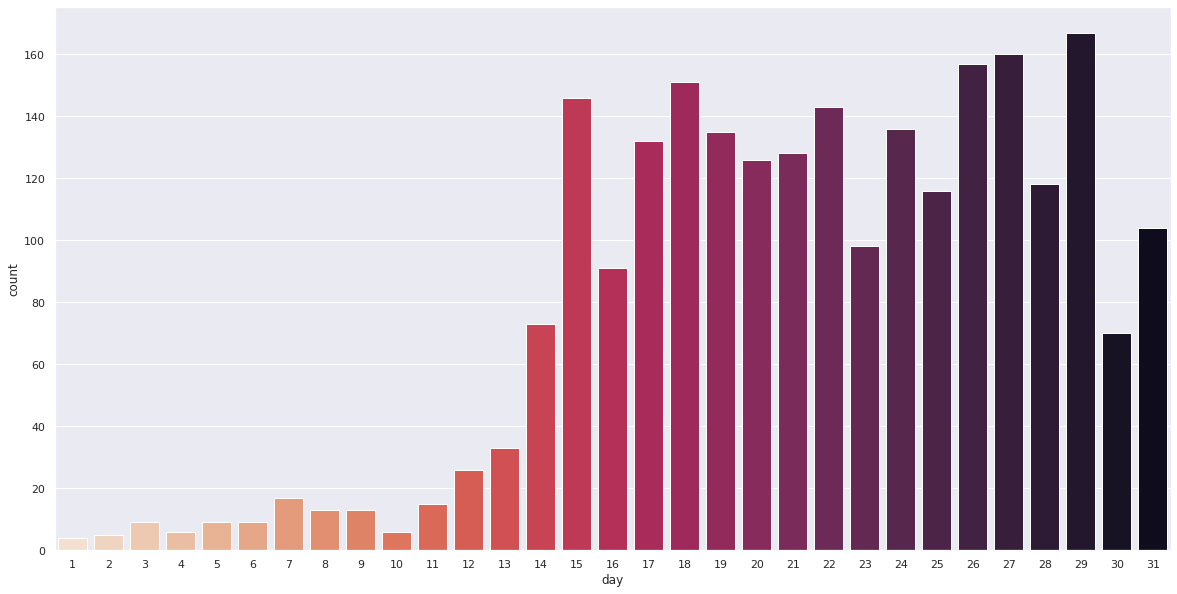

In [ ]:
plt.figure(figsize=(20, 10))

sns.set(style='darkgrid')
ax = sns.countplot(x='day', data=corona_del_info[corona_del_info['month'] == '8'], palette='rocket_r', order=order2)

퀴즈 1. 8월달 일별 확진자 수 중 가장 많은 확진자가 발생한 날짜

In [ ]:
august_max_day = corona_del_info[corona_del_info['month'] == '8']['day'].value_counts().index[0]

print(f'8월 가장 많은 확진자가 발생한 날짜는 {august_max_day}일')

8월 가장 많은 확진자가 발생한 날짜는 29일


퀴즈 2. 8월 평균 일별 확진자 수

In [ ]:
# day_mean_counts = corona_del_info[corona_del_info['month'] == '8']['day'].count() / 31
day_mean_counts = corona_del_info[corona_del_info['month'] == '8']['day'].value_counts().mean()

print(f'8월 평균 일별 확진자 수: {day_mean_counts}명')

8월 평균 일별 확진자 수: 77.93548387096774명


### 4) 지역별 확진자 수 출력


In [ ]:
corona_del_info['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


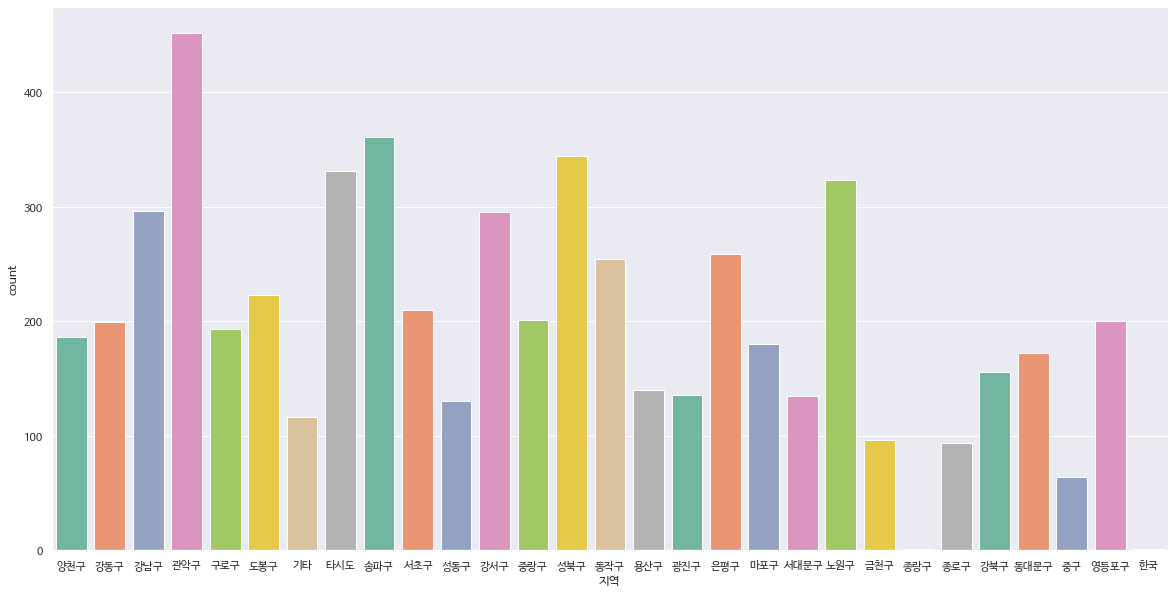

In [ ]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_del_info, palette="Set2")

In [ ]:
# 지역 이상치 데이터 처리 -> 종랑구 -> 중랑구, 한국 -> 기타

corona_out_region = corona_del_info.replace({'종랑구':'중랑구', '한국':'기타'})

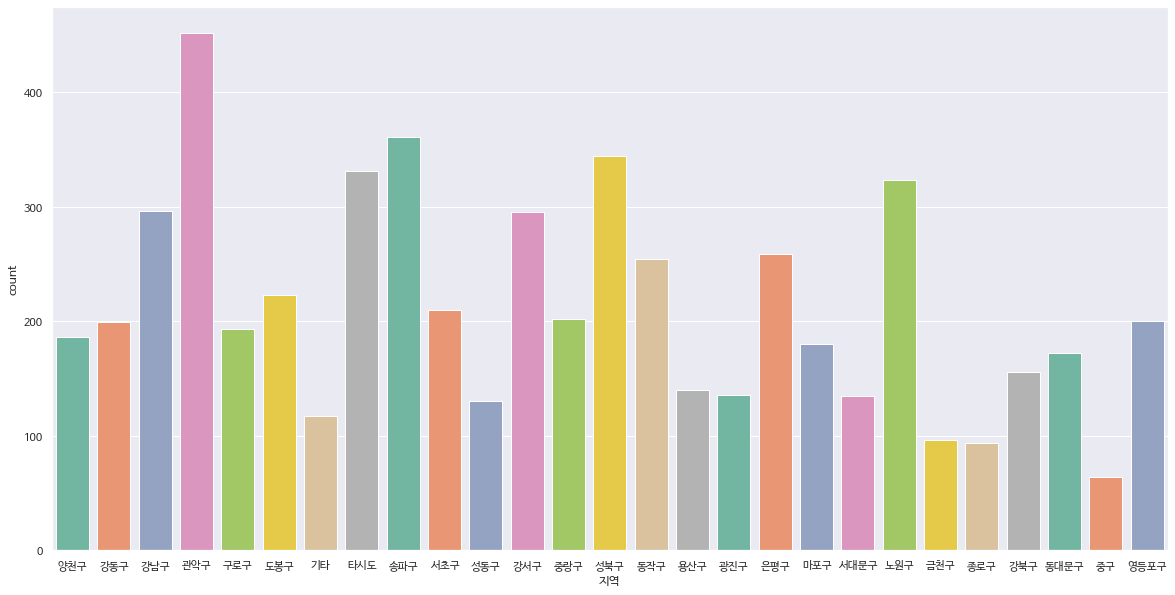

In [ ]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

### 5) 8월달 지역별 확진자 수 출력

In [ ]:
corona_out_region[corona_out_region['month'] == '8']['지역'].value_counts()

성북구     244
노원구     191
송파구     161
타시도     143
은평구     121
강서구     116
동작구     110
관악구     109
중랑구     104
강동구      94
강남구      89
강북구      85
양천구      80
마포구      79
서초구      79
동대문구     76
광진구      74
도봉구      73
영등포구     68
구로구      60
서대문구     52
용산구      48
종로구      37
금천구      34
성동구      33
중구       31
기타       25
Name: 지역, dtype: int64

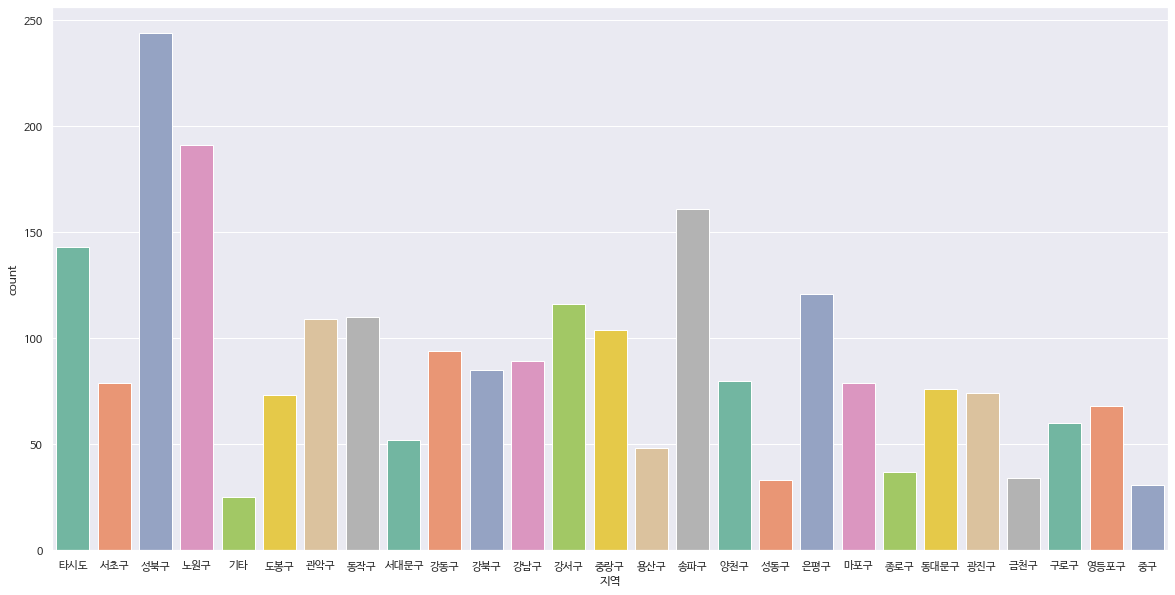

In [ ]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_out_region['month'] == '8'], palette="Set2")

### 6) 월별 관악구 확진자 수 출력

In [ ]:
corona_out_region[corona_out_region['지역'] == '관악구']['month'].value_counts()

9     135
8     109
10     63
6      59
3      30
7      27
5      16
4       9
2       4
Name: month, dtype: int64

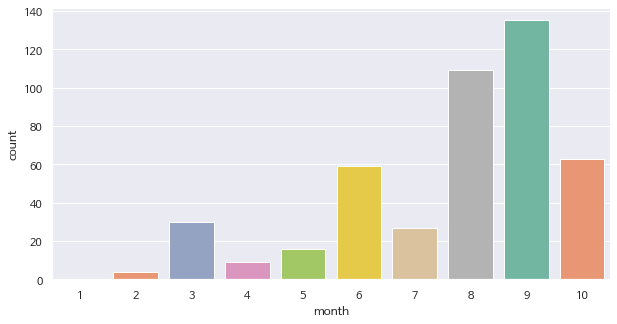

In [ ]:
plt.figure(figsize=(10, 5))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="month", data=corona_out_region[corona_out_region['지역'] == '관악구'], palette="Set2", order=order)

### 7) 서울 지역에서 확진자를 지도에 출력

In [ ]:
 # 지도 출력을 위한 라이브러리
 import folium

In [ ]:
# # Map 함수를 사용하여 지도 출력
# map = folium.Map(location=[37.529622, 126.984507], zoom_start=11)

# map

In [ ]:
# 서울시 행정구역 시군 좌표정보 데이터
CRS = pd.read_csv('/content/drive/MyDrive/colab/machine_learning/[project 1]국내 코로나 환자 데이터를 활용한 데이터 분석/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')

In [ ]:
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [ ]:
CRS[CRS['시군구명_한글'] == '중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


In [ ]:
# corona_out_region에 '타시도', '기타'는 위도, 경도 데이터를 찾을 수 없으므로 삭제
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역']=='타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역']=='기타'].index)

In [ ]:
# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=11)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):
  # 해당 지역의 데이터 개수를 count에 저장합니다.
  count = len(corona_seoul[corona_seoul['지역'] == region])
  # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
  CRS_region = CRS[CRS['시군구명_한글'] == region]
  # print(region)
  location = [float(CRS_region['위도'].values), float(CRS_region['경도'].values)]
  # print(location)
  # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
  marker = folium.CircleMarker(location=location, # 위치
                                radius=count/10 + 10,             # 범위
                                color='#3186cc',            # 선 색상
                                fill_color='#3186cc',       # 면 색상
                                popup=' '.join((region, str(count), '명'))).add_to(map_osm) # 팝업 설정
  
  # 생성한 원형마커를 지도에 추가합니다.
  # marker.add_to(map_osm)

In [ ]:
map_osm

퀴즈 3.6월에 확진자가 가장 많이 나온 지역을 구하세요.

In [ ]:
june_max_region = corona_out_region[corona_out_region['month'] == '6']['지역'].value_counts().index[0]

print(f'6월에 확진자가 가장 많이 나온 지역은 {june_max_region}입니다.')

6월에 확진자가 가장 많이 나온 지역은 관악구입니다.
